In [8]:
from pathlib import Path
import sys
from datetime import date

import rasterio
from cropharvest.inference import Inference
from cropharvest.engineer import Engineer

sys.path.append('..')

from src.models import LandCoverMapper

In [59]:
test_folder = Path("/media/Elements-12TB/satellite_images/nigeria/raw/nigeria-full-country-2020/")
data_dir = Path("/media/Elements-12TB/satellite_images/nigeria/predictions/preds_dummy")
model_path = "../data/lightning_logs/version_867/checkpoints/epoch=19.ckpt"

In [60]:
data_dir.mkdir(exist_ok=True, parents=True)

In [4]:
model = LandCoverMapper.load_from_checkpoint(model_path)

Found normalizing dict geowiki_normalizing_dict_Ghana_Togo_Nigeria_Cameroon_Benin.h5
Loading normalizing dict geowiki_normalizing_dict_Ghana_Togo_Nigeria_Cameroon_Benin.h5
Creating Geowiki train split
Creating Geowiki val split
Number of instances in Geowiki training set: 632
Number of instances in Nigeria training set: 913
Total number of files used for training: 1545
Number of instances in Geowiki validation set: 158
Number of instances in Nigeria validation set: 454
Total number of files used for validation: 612
Number of global labels: 2157
Number of local labels: 0
Global class weights: tensor([1.9004, 2.1106])
Local class weights: None
Number of model parameters: 21569


In [5]:
test_files = sorted(test_folder.glob("*.tif"), key=lambda x:int(x.stem.split('-')[0]))

### Experimenting

In [18]:
test_files[1]

PosixPath('/media/Elements-12TB/satellite_images/nigeria/raw/nigeria-full-country-2020/3-0000000000-0000001792.tif')

In [5]:
p = Path('../3-0000000000-0000000000.tif')
p

PosixPath('../3-0000000000-0000000000.tif')

In [8]:
new_filename = p.stem + '-2025-01-01' + p.suffix
p_new = p.parent / new_filename
p_new

PosixPath('../3-0000000000-0000000000-2025-01-01.tif')

In [7]:
#p.rename(p_new)

In [9]:
p_new.exists()

True

In [27]:
path = Path('../3-0000001792-0000001792-2025-01-01.tif')
#path = Path('../23-0000001792-0000001792-2025-01-01.tif')

In [28]:
preds = Inference(model=model, normalizing_dict=None, batch_size=8192).run(path)

/home/gajo/miniconda3/envs/nigeria-crop-mask-gpu/lib/python3.7/site-packages/cropharvest/engineer.py:229: RuntimeWarning: Mean of empty slice
  average_slope = np.nanmean(static_data.values[STATIC_BANDS.index("slope"), :, :])
/home/gajo/miniconda3/envs/nigeria-crop-mask-gpu/lib/python3.7/site-packages/cropharvest/engineer.py:351: RuntimeWarning: Mean of empty slice
  mean_per_band = np.nanmean(np.nanmean(array, axis=0), axis=0)


RuntimeError: fillna on the test instance returned None; does the test instance contain NaN only bands?

In [17]:
preds.dims
assert preds.min() >= 0
assert preds.max() <= 1

preds

<xarray.Dataset>
Dimensions:       (lat: 231, lon: 245)
Coordinates:
  * lat           (lat) float64 8.418 8.418 8.418 8.418 ... 8.438 8.438 8.438
  * lon           (lon) float64 2.853 2.853 2.853 2.853 ... 2.874 2.874 2.875
Data variables:
    prediction_0  (lat, lon) float32 0.4243 0.4181 0.3703 ... 0.3376 0.4159

In [18]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Latitude')

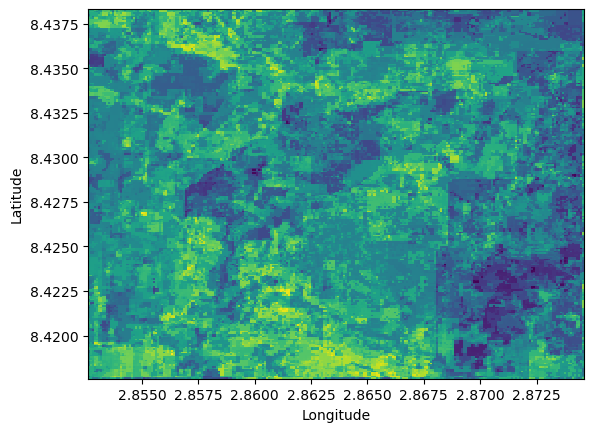

In [19]:
preds_np = preds.to_array()[0]
plt.pcolormesh(preds_np.lon, preds_np.lat, preds_np.data)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [45]:
path = Path('../23-0000001792-0000001792_2025-01-01.tif')

In [46]:
start_date = Inference.start_date_from_str(path)
da, slope = Engineer.load_tif(path, start_date)

In [26]:
slope

3.001312482002567

In [47]:
da

<xarray.DataArray 'FEATURES' (time: 12, band: 19, y: 231, x: 245)>
array([[[[-1.18189394e+01, -1.06378483e+01, -1.07432743e+01, ...,
          -9.21043005e+00, -1.01144077e+01, -1.02644395e+01],
         [-1.12575273e+01, -1.07075146e+01, -1.03855327e+01, ...,
          -9.64720071e+00, -1.00456540e+01, -1.06264532e+01],
         [-1.24829709e+01, -1.05204269e+01, -1.07591148e+01, ...,
          -9.00635440e+00, -9.26593670e+00, -9.92289276e+00],
         ...,
         [-1.20593605e+01, -1.02680201e+01, -1.01252623e+01, ...,
          -1.16212217e+01, -9.76996820e+00, -9.05172762e+00],
         [-1.27213482e+01, -1.40576158e+01, -1.28024179e+01, ...,
          -8.87378260e+00, -8.09213361e+00, -9.68397457e+00],
         [-1.24169002e+01, -1.30035861e+01, -1.32251742e+01, ...,
          -6.79297261e+00, -8.35252613e+00, -1.03725703e+01]],

        [[-2.06203953e+01, -2.12114589e+01, -2.21796941e+01, ...,
          -1.46348303e+01, -1.42590180e+01, -1.34527638e+01],
         [-2.07754877e+01, -2.14886531e+01, -2.27525117e+01, ...,
          -1.79256522e+01, -1.69489252e+01, -1.59407985e+01],
         [-2.11074342e+01, -2.18206457e+01, -2.11451010e+01, ...,
          -1.71230072e+01, -1.78658989e+01, -1.66842987e+01],
...
         [ 2.77000000e+02,  2.77000000e+02,  2.77000000e+02, ...,
           2.47000000e+02,  2.47000000e+02,  2.47000000e+02],
         [ 2.77000000e+02,  2.77000000e+02,  2.77000000e+02, ...,
           2.47000000e+02,  2.47000000e+02,  2.47000000e+02],
         [ 2.77000000e+02,  2.77000000e+02,  2.77000000e+02, ...,
           2.46000000e+02,  2.46000000e+02,  2.46000000e+02]],

        [[ 9.27409947e-01,  9.27409947e-01,  9.27409947e-01, ...,
                      nan,             nan,             nan],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
                      nan,             nan,             nan],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
                      nan,             nan,             nan],
         ...,
         [ 9.37507987e-01,  9.37507987e-01,  9.37507987e-01, ...,
                      nan,             nan,             nan],
         [ 9.37507987e-01,  9.37507987e-01,  9.37507987e-01, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]]]])
Coordinates:
  * band     (band) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18
  * y        (y) float64 8.438 8.438 8.438 8.438 ... 8.418 8.418 8.418 8.418
  * x        (x) float64 2.853 2.853 2.853 2.853 ... 2.874 2.874 2.874 2.875
  * time     (time) datetime64[ns] 2025-01-01 2025-01-31 ... 2025-11-27
Attributes:
    transform:          (8.983152841195215e-05, 0.0, 2.8526001847215405, 0.0,...
    crs:                +init=epsg:4326
    res:                (8.983152841195215e-05, 8.983152841195215e-05)
    is_tiled:           1
    nodatavals:         (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na...
    scales:             (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1....
    offsets:            (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....
    descriptions:       ('VV', 'VH', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7'...
    AREA_OR_POINT:      Area
    band_descriptions:  ['VV', 'VH', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8'...

In [19]:
da.where(da.isnull())

<xarray.DataArray 'FEATURES' (time: 12, band: 19, y: 230, x: 245)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * band     (band) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18
  * y        (y) float64 4.806 4.806 4.806 4.806 ... 4.786 4.786 4.786 4.785
  * x        (x) float64 2.853 2.853 2.853 2.853 ... 2.874 2.874 2.874 2.875
  * time     (time) datetime64[ns] 2025-01-01 2025-01-31 ... 2025-11-27
Attributes:
    transform:          (8.983152841195215e-05, 0.0, 2.8526001847215405, 0.0,...
    crs:                +init=epsg:4326
    res:                (8.983152841195215e-05, 8.983152841195215e-05)
    is_tiled:           1
    nodatavals:         (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na...
    scales:             (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1....
    offsets:            (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....
    descriptions:       ('VV', 'VH', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7'...
    AREA_OR_POINT:      Area
    band_descriptions:  ['VV', 'VH', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8'...

In [22]:
da.where(da % 2 == 1).shape

(12, 19, 230, 245)

In [48]:
x_np = da.to_numpy()

In [49]:
import numpy as np

In [50]:
np.isnan(x_np).sum(axis=-1).sum(axis=-1)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 935],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 935],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 935],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 935],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 935],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 935],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 935],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 935],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0

In [20]:
from cropharvest.bands import *

In [23]:
RAW_BANDS

['VV',
 'VH',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B8A',
 'B9',
 'B10',
 'B11',
 'B12',
 'temperature_2m',
 'total_precipitation',
 'elevation',
 'slope']

In [25]:
len(BANDS_MAX)

18

### Change filenames

In [55]:
filepaths = list(Path('..').glob('*.tif'))
filepaths

[PosixPath('../3-0000000000-0000000000-2025-01-01.tif'),
 PosixPath('../23-0000001792-0000001792_2025-01-01.tif'),
 PosixPath('../3-0000001792-0000001792_2019-04-03.tif')]

In [34]:
p = filepaths[0]
p

PosixPath('../3-0000001792-0000001792.tif')

In [36]:
date_string = date(2019, 4, 3).strftime('%Y-%m-%d')

In [40]:
new_filename = f'{p.stem}_{date_string}{p.suffix}'
p_new = p.parent / new_filename
p_new

PosixPath('../3-0000001792-0000001792_2019-04-03.tif')

In [41]:
p.rename(p_new)

In [57]:
# date_string = date(2019, 4, 3).strftime('%Y-%m-%d')
# for path in test_files:
#     new_filename = f'{path.stem}_{date_string}{path.suffix}'
#     new_path = path.parent / new_filename
#     path.replace(new_path)

### Make predictions (skip if error)

In [61]:
test_files = sorted(test_folder.glob("*.tif"), key=lambda x:int(x.stem.split('-')[0]))

In [64]:
all([file.exists() for file in test_files])

True

In [69]:
inferer = Inference(model=model, normalizing_dict=None, batch_size=8192, device='cuda')

In [70]:
for path in test_files[20:25]:
    print(f'Predicting on file {path}')
    try:
        preds = inferer.run(path, dest_path=data_dir / f"preds_{path.name}.nc")
    except RuntimeError as e:
        print('Encounter the following error, skipping!: ', e)

Predicting on file /media/Elements-12TB/satellite_images/nigeria/raw/nigeria-full-country-2020/8-0000000000-0000000000_2019-04-03.tif


/home/gajo/miniconda3/envs/nigeria-crop-mask-gpu/lib/python3.7/site-packages/cropharvest/engineer.py:229: RuntimeWarning: Mean of empty slice
  average_slope = np.nanmean(static_data.values[STATIC_BANDS.index("slope"), :, :])
/home/gajo/miniconda3/envs/nigeria-crop-mask-gpu/lib/python3.7/site-packages/cropharvest/engineer.py:351: RuntimeWarning: Mean of empty slice
  mean_per_band = np.nanmean(np.nanmean(array, axis=0), axis=0)


Encounter the following error, skipping!:  fillna on the test instance returned None; does the test instance contain NaN only bands?
Predicting on file /media/Elements-12TB/satellite_images/nigeria/raw/nigeria-full-country-2020/8-0000000000-0000001792_2019-04-03.tif


/home/gajo/miniconda3/envs/nigeria-crop-mask-gpu/lib/python3.7/site-packages/cropharvest/engineer.py:229: RuntimeWarning: Mean of empty slice
  average_slope = np.nanmean(static_data.values[STATIC_BANDS.index("slope"), :, :])
/home/gajo/miniconda3/envs/nigeria-crop-mask-gpu/lib/python3.7/site-packages/cropharvest/engineer.py:351: RuntimeWarning: Mean of empty slice
  mean_per_band = np.nanmean(np.nanmean(array, axis=0), axis=0)


Encounter the following error, skipping!:  fillna on the test instance returned None; does the test instance contain NaN only bands?
Predicting on file /media/Elements-12TB/satellite_images/nigeria/raw/nigeria-full-country-2020/8-0000001792-0000000000_2019-04-03.tif


/home/gajo/miniconda3/envs/nigeria-crop-mask-gpu/lib/python3.7/site-packages/cropharvest/engineer.py:229: RuntimeWarning: Mean of empty slice
  average_slope = np.nanmean(static_data.values[STATIC_BANDS.index("slope"), :, :])
/home/gajo/miniconda3/envs/nigeria-crop-mask-gpu/lib/python3.7/site-packages/cropharvest/engineer.py:351: RuntimeWarning: Mean of empty slice
  mean_per_band = np.nanmean(np.nanmean(array, axis=0), axis=0)


Encounter the following error, skipping!:  fillna on the test instance returned None; does the test instance contain NaN only bands?
Predicting on file /media/Elements-12TB/satellite_images/nigeria/raw/nigeria-full-country-2020/8-0000001792-0000001792_2019-04-03.tif


/home/gajo/miniconda3/envs/nigeria-crop-mask-gpu/lib/python3.7/site-packages/cropharvest/engineer.py:229: RuntimeWarning: Mean of empty slice
  average_slope = np.nanmean(static_data.values[STATIC_BANDS.index("slope"), :, :])
/home/gajo/miniconda3/envs/nigeria-crop-mask-gpu/lib/python3.7/site-packages/cropharvest/engineer.py:351: RuntimeWarning: Mean of empty slice
  mean_per_band = np.nanmean(np.nanmean(array, axis=0), axis=0)


Encounter the following error, skipping!:  fillna on the test instance returned None; does the test instance contain NaN only bands?
Predicting on file /media/Elements-12TB/satellite_images/nigeria/raw/nigeria-full-country-2020/9-0000000000-0000000000_2019-04-03.tif
Encounter the following error, skipping!:  fillna on the test instance returned None; does the test instance contain NaN only bands?


/home/gajo/miniconda3/envs/nigeria-crop-mask-gpu/lib/python3.7/site-packages/cropharvest/engineer.py:351: RuntimeWarning: Mean of empty slice
  mean_per_band = np.nanmean(np.nanmean(array, axis=0), axis=0)
